These exercises use the tips dataset in Seaborn to explore various visualization techniques. The dataset contains restaurant tip data with columns: `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, and `size`. For each exercise, load the dataset using `sns.load_dataset('tips')` and create the specified plot. Refer to the Seaborn documentation (https://seaborn.pydata.org/) for details on functions and parameters.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

### **Exercise 1: Bar Plot**

**Task:** Create a bar plot showing the average tip amount for each day of the week. Use different colors for each day and add error bars to show the confidence interval.<br>
**Instructions:** Use `sns.barplot()`. Check the documentation for the `hue` and `ci` parameters to customize colors and error bars. Add a title and label the axes.<br>
**Hint:** Group the data by `day` and compute the mean `tip`.

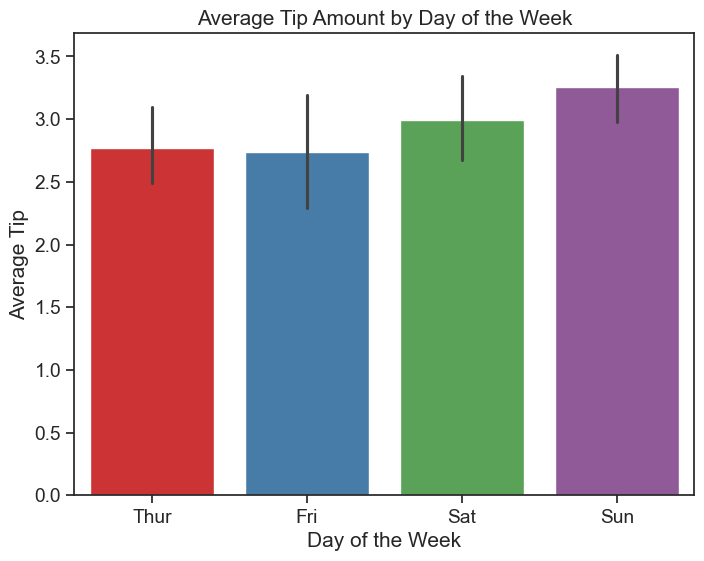

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=tips, x='day',y='tip',hue='day',palette='Set1',errorbar=('ci', 95)) # confidence interval 95%

plt.title('Average Tip Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip')
plt.show()

### **Exercise 2: Histogram**

**Task**: Plot a histogram of the total bill amounts, with separate histograms for male and female customers overlaid on the same plot. Use different colors and transparency for clarity.  
**Instructions**: Use `sns.histplot()`. Explore the `hue` parameter to differentiate by `sex` and set `alpha` for transparency. Read the documentation to adjust the number of bins (`bins`). Set a title and axis labels.  
**Hint**: Use `element='step'` for a cleaner overlay of histograms.

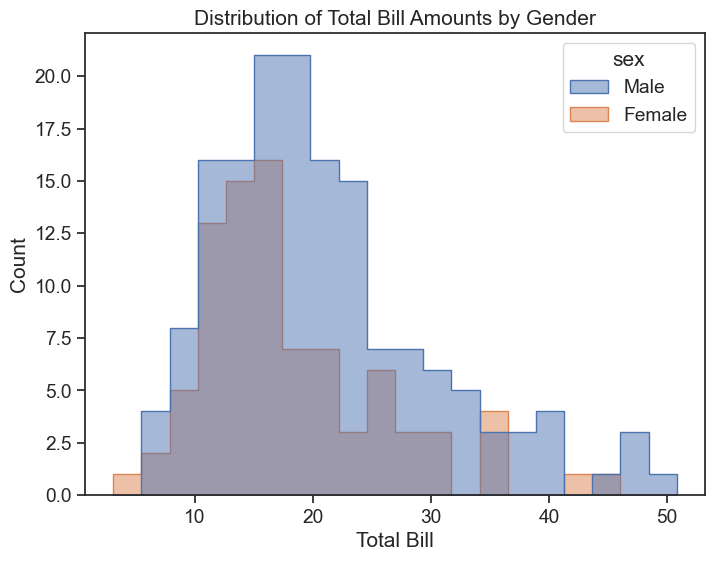

In [69]:
plt.figure(figsize=(8,6))

sns.histplot(data=tips ,x='total_bill',hue='sex',bins=20,alpha=0.5,element='step') # alpha --> Transparency
                                                                                   #  step --> make line draw not line

plt.title("Distribution of Total Bill Amounts by Gender")
plt.xlabel("Total Bill")
plt.ylabel("Count")
plt.show()

### **Exercise 3: Pie Chart**

**Task**: Create a pie chart showing the proportion of customers by party size (`size`). Each slice should represent a unique party size, with percentages displayed.  
**Instructions**: Seaborn doesn’t have a direct pie chart function, so use `matplotlib.pyplot.pie()` with data aggregated from the tips dataset. Compute the count of each `size` using `value_counts()`. Customize the chart with colors and labels; refer to Matplotlib’s pie chart documentation for `autopct`.  
**Hint**: Use `tips['size'].value_counts()` to get the data and pass it to `plt.pie()`.

In [63]:
size_counts = tips["size"].value_counts().sort_index()
size_counts

size
1      4
2    156
3     38
4     37
5      5
6      4
Name: count, dtype: int64

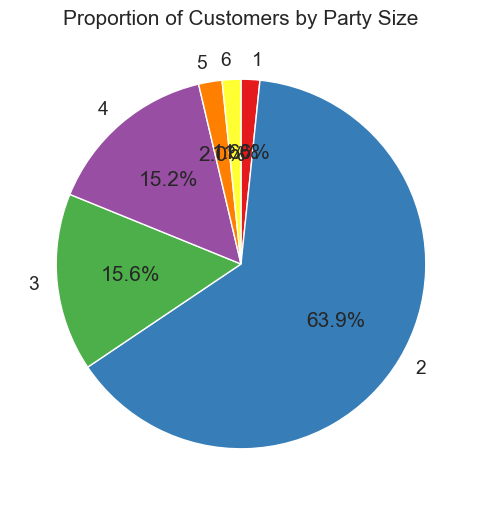

In [70]:
plt.figure(figsize=(8,6))
plt.pie(
    size_counts,                       
    labels=size_counts.index,          
    autopct="%1.1f%%",    # % on draw      
    colors=sns.color_palette("Set1"),  
    startangle=90,        # start draw from top                   
    counterclock=False    # order opposite from clock            
)

plt.title("Proportion of Customers by Party Size")
plt.show()

### **Exercise 4: Scatter Plot**

**Task**: Create a scatter plot of `total_bill` (x-axis) vs. `tip` (y-axis), with points colored by `smoker` status and sized by party `size`.  
**Instructions**: Use `sns.scatterplot()`. Check the documentation for `hue` and `size` parameters to encode additional variables. Add a title, axis labels, and a legend.  
**Hint**: Adjust the `sizes` parameter to control the range of point sizes (e.g., `sizes=(20, 200)`).

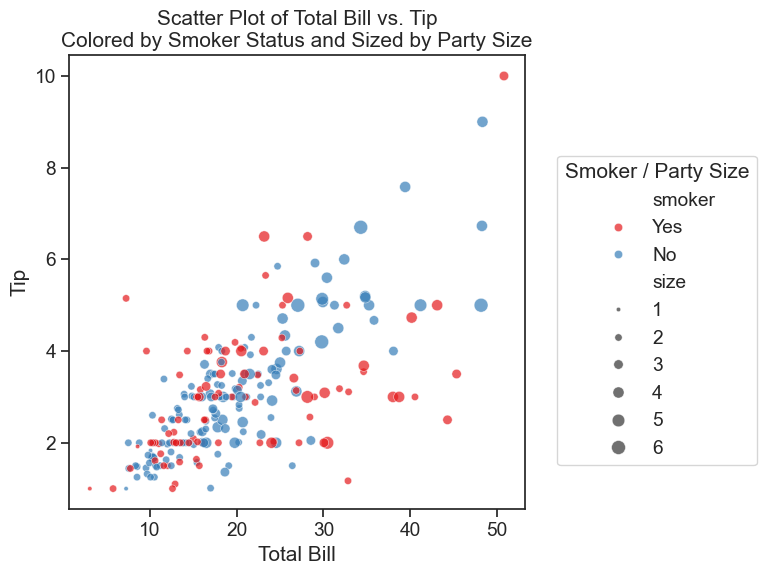

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tips,
                x='total_bill',
                y ='tip',
                hue ='smoker',
                size='size',     #point size based on group
                sizes =(10,100), #points size scale from min 10 to max 100
                alpha=0.7,
                palette='Set1')

plt.title("Scatter Plot of Total Bill vs. Tip\nColored by Smoker Status and Sized by Party Size")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.legend(title="Smoker / Party Size", bbox_to_anchor=(1.05, 0.8))

plt.tight_layout()
plt.show()

**Task**: Plot the average tip amount over different party sizes, with separate lines for lunch and dinner (`time`). Include confidence intervals as shaded areas.  
**Instructions**: Use `sns.lineplot()`. Read the documentation to use `hue` for `time` and enable confidence intervals with `ci='sd'`. Group the data by `size` and `time` to compute mean `tip`. Add a title and labels.  
**Hint**: The x-axis should represent `size` (1 to 6), and the y-axis should show mean `tip`.

In [96]:
grouped = tips.groupby(["size", "time"])["tip"].mean().reset_index()
grouped

C:\Users\mosta\AppData\Local\Temp\ipykernel_20072\2631327695.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips.groupby(["size", "time"])["tip"].mean().reset_index()


,size,time,tip
0,1,Lunch,1.875000
1,1,Dinner,1.000000
2,2,Lunch,2.423077
3,2,Dinner,2.661923
4,3,Lunch,2.754000
5,3,Dinner,3.490000
6,4,Lunch,4.218000
7,4,Dinner,4.122500
8,5,Lunch,5.000000
9,5,Dinner,3.785000


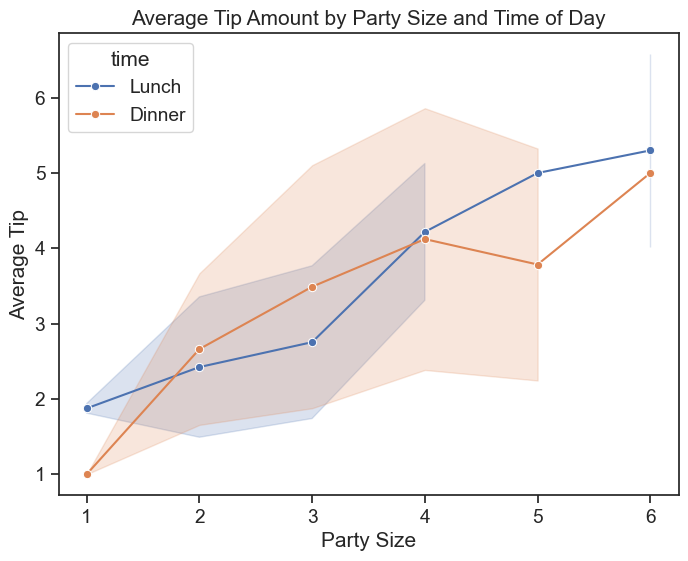

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=tips,
            x="size",
            y="tip",
            hue="time",     
            errorbar="sd",      # show standard deviation as shaded area   
            marker="o" 
            )   

plt.title("Average Tip Amount by Party Size and Time of Day")
plt.xlabel("Party Size")
plt.ylabel("Average Tip")

plt.show()


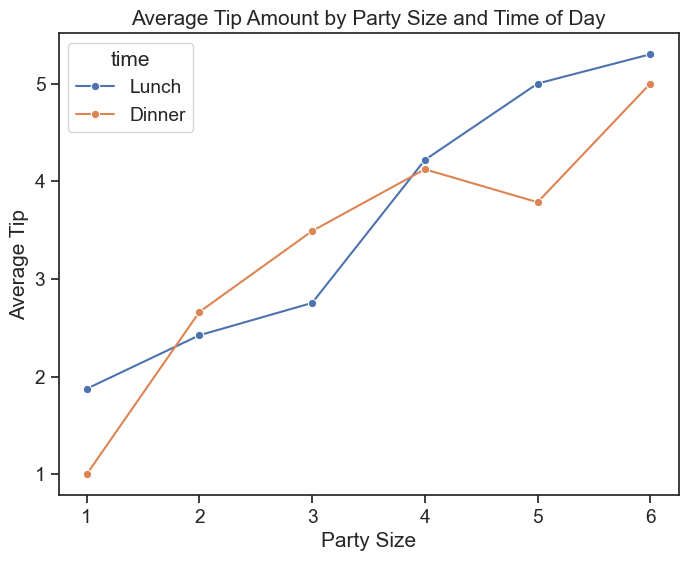

In [116]:
plt.figure(figsize=(8,6))
sns.lineplot(data=grouped,
            x="size",
            y="tip",
            hue="time",            
            marker="o" 
            )   

plt.title("Average Tip Amount by Party Size and Time of Day")
plt.xlabel("Party Size")
plt.ylabel("Average Tip")

plt.show()

### **Exercise 6: Catplot**

**Task**: Create a categorical plot to compare tip amounts across days, with separate subplots for `smoker` status. Use box plots to show the distribution of tips.  
**Instructions**: Use `sns.catplot()`. Explore the documentation for the `kind` parameter (set `kind='box'`) and `col` to create subplots by `smoker`. Set `x='day'`, `y='tip'`. Add a title to the figure using `fig.suptitle()`.  
**Hint**: Check how to adjust the figure size in `catplot` with `height` and `aspect`.

<Figure size 800x600 with 0 Axes>

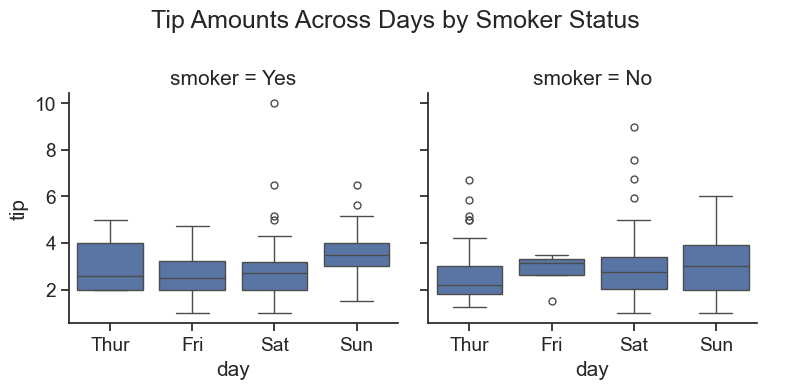

In [71]:
plt.figure(figsize=(8,6))
n=sns.catplot(data=tips, x="day", y="tip",col='smoker', kind="box", height=4,aspect=1 )
n.figure.suptitle("Tip Amounts Across Days by Smoker Status")
n.tight_layout()
plt.show()

### **Exercise 7: Relplot**

**Task**: Create a relational plot showing `total_bill` vs. `tip`, with subplots for each `day` and points colored by `sex`. Use different markers for male and female customers.  
**Instructions**: Use `sns.relplot()`. Refer to the documentation for `col` to split by `day`, `hue` for `sex`, and `style` for different markers. Add a title and ensure the legend is clear.  
**Hint**: Use `col_wrap=2` to arrange subplots in a 2-column grid.

visualize many different statistical relationships.

<Figure size 800x600 with 0 Axes>

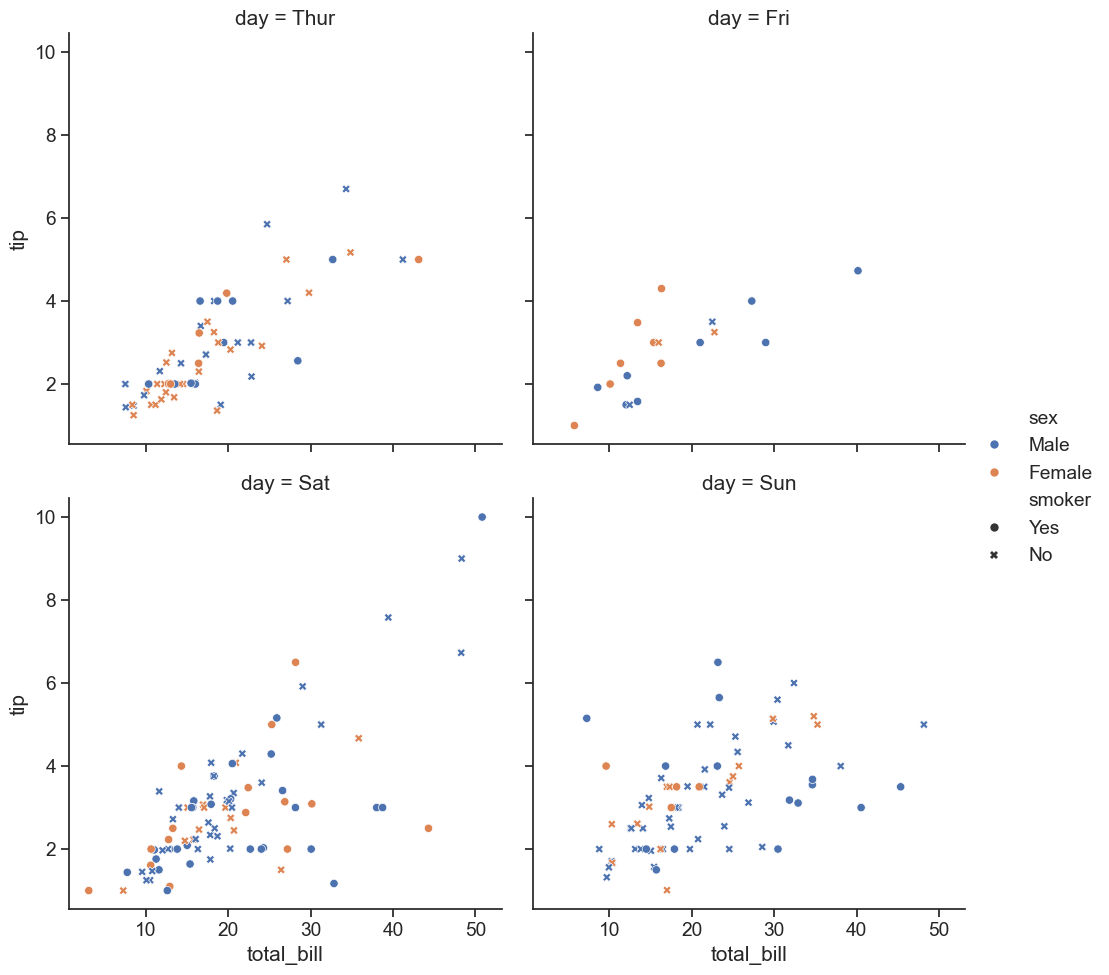

In [72]:
plt.figure(figsize=(8,6))
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="day",
    hue="sex", style="smoker",col_wrap=2
)

### **Exercise 8: Displot**

**Task**: Create a distribution plot of tip amounts, showing histograms and kernel density estimates (KDE) for lunch and dinner (`time`) in separate subplots.  
**Instructions**: Use `sns.displot()`. Check the documentation for `kind='hist'`, `kde=True`, and `col` to split by `time`. Set `x='tip'` and use `hue='time'` for coloring. Add a title and labels.  
**Hint**: Experiment with `bins` and `kde_kws` to customize the KDE smoothness.

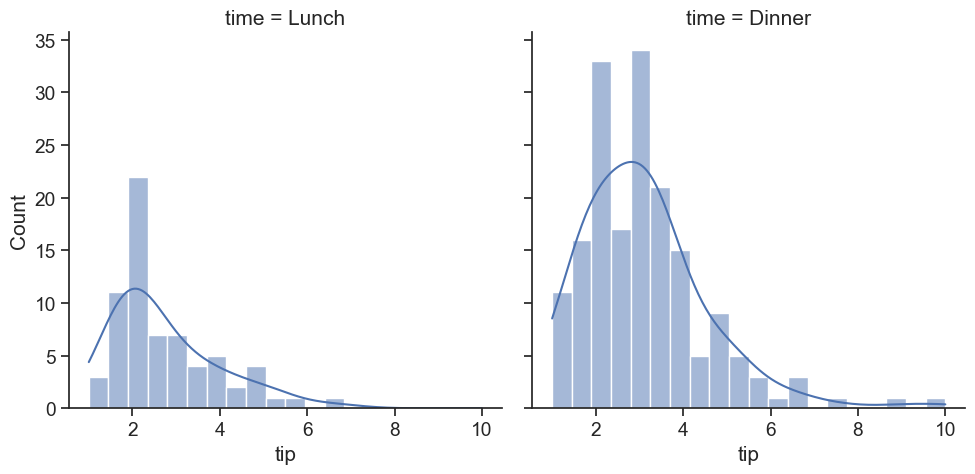

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=tips,
            x="tip",
            col="time",
            kde=True,
            kind='hist',
            bins=20 ,
            kde_kws={"bw_adjust": 1.2, "cut": 0} )

KDE is a smooth curve that estimates the probability distribution of the tips.
It makes it easier to see the general shape of the data (peaks, spread, skew).

bw_adjust=1.2: Adjusts the bandwidth (smoothness of the KDE). Larger = smoother, smaller = more wiggly.

cut=0: Prevents the KDE curve from extending beyond the data range (otherwise KDE can "spill over").

### **Exercise 9: FacetGrid**

**Task**: Use FacetGrid to create a grid of scatter plots showing `total_bill` vs. `tip`, with rows for `smoker` and columns for `time`. Add a regression line to each subplot.  
**Instructions**: Use `sns.FacetGrid()`. Read the documentation to set up the grid with `row='smoker'` and `col='time'`. Map `sns.scatterplot` and `sns.regplot` to each facet. Add a title to the figure.  
**Hint**: Use `map_dataframe()` to apply plotting functions and set `scatter_kws` for point styling.

<Figure size 800x600 with 0 Axes>

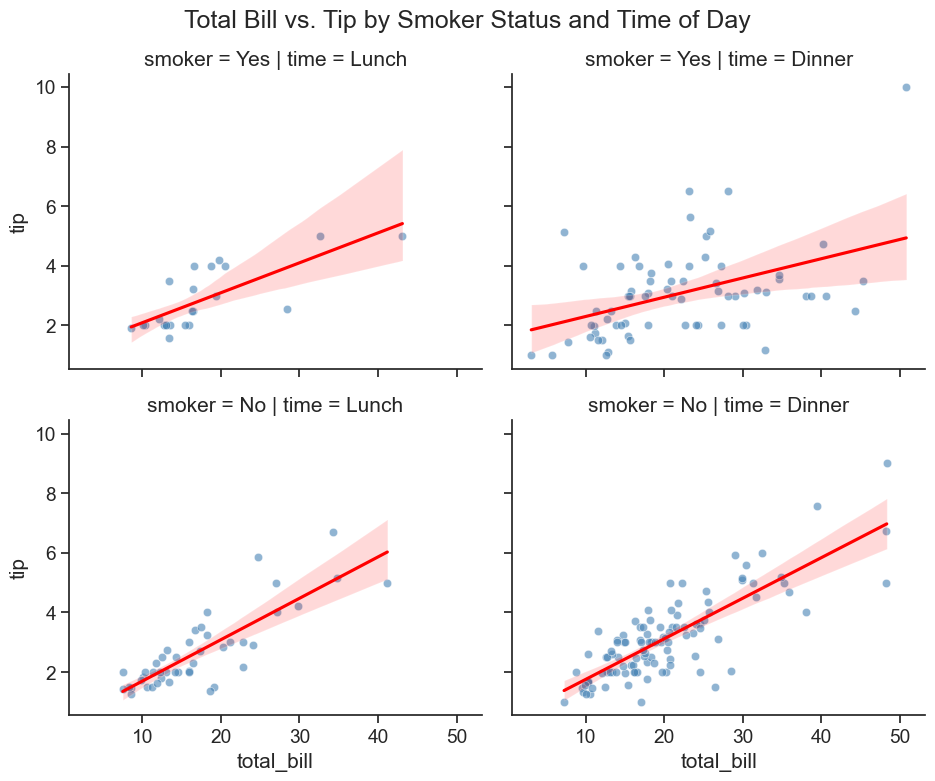

In [130]:
plt.figure(figsize=(8,6))

g = sns.FacetGrid(
    data=tips,
    row="smoker",
    col="time",
    height=4,
    aspect=1.2
)

g.map_dataframe(
    sns.scatterplot,
    x="total_bill",
    y="tip",
    color="steelblue",
    alpha=0.6
)

g.map_dataframe(
    sns.regplot,
    x="total_bill",
    y="tip",
    scatter=False,    # we already draw points so dont draw it again
    line_kws={"color": "red"} # line color
)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Total Bill vs. Tip by Smoker Status and Time of Day")

plt.show()

### **Exercise 10: Regression Plot**

**Task**: Create a regression plot of `total_bill` vs. `tip`, with a linear fit and confidence intervals. Add a second plot with a polynomial regression (degree 2) for comparison.  
**Instructions**: Use `sns.lmplot()` for the linear fit. Check the documentation for `order=2` to create the polynomial fit in a separate `lmplot`. Set `x='total_bill'`, `y='tip'`, and use `hue='smoker'` to differentiate smokers and non-smokers. Add titles and labels.  
**Hint**: Use `ci=95` for confidence intervals and `scatter_kws` to adjust point appearance.

Text(0.5, 0.98, 'Linear Regression: Total Bill vs Tip')

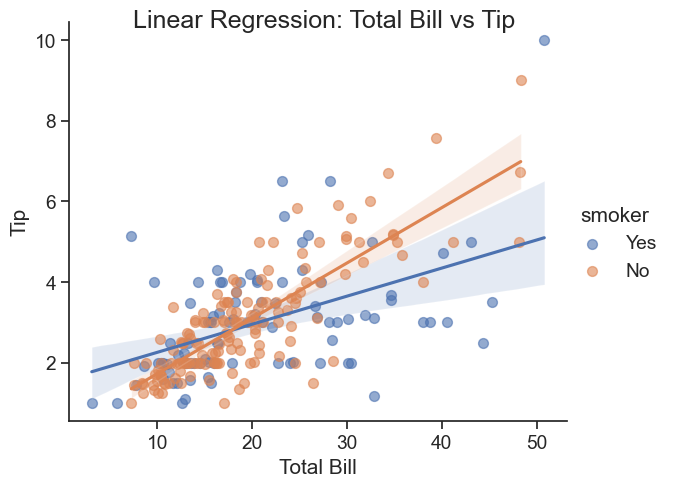

In [ ]:
g1 = sns.lmplot(  # draw linear model plot
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    ci=95,    
    scatter_kws={"alpha": 0.6, "s": 50},  # control point shape   alpha for Transparency   s for size
    height=5, 
    aspect=1.2
)

g1.set_axis_labels("Total Bill", "Tip")
g1.fig.suptitle("Linear Regression: Total Bill vs Tip")


Text(0.5, 0.98, 'Polynomial Regression (Degree 2): Total Bill vs Tip')

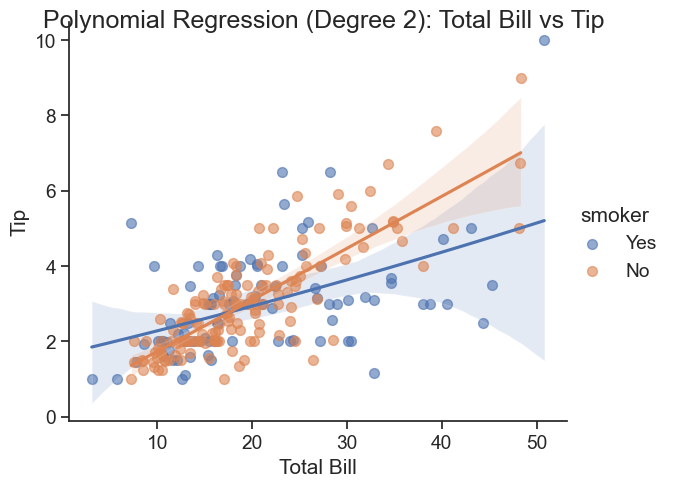

In [ ]:
g2 = sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    order=2,  #### do regressiom ploynomial degree 2
    ci=95,
    scatter_kws={"alpha": 0.6, "s": 50},
    height=5,
    aspect=1.2
)

g2.set_axis_labels("Total Bill", "Tip")
g2.fig.suptitle("Polynomial Regression (Degree 2): Total Bill vs Tip")
